<a href="https://colab.research.google.com/github/metbrian/DSPS_BFrei/blob/main/HW10/hw10_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#import glob
import pylab as pl
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

In [3]:
from tensorflow import keras
from keras import optimizers

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

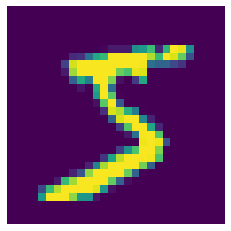

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [5]:
x_train.dtype, x_train.max(), x_train.min()

(dtype('uint8'), 255, 0)

In [6]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [7]:
xshape = x_train.shape[1]

In [8]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [29]:
model = Sequential()
## encoder
# input layer and the output size
model.add(Dense(ndim, activation='relu'))
model.add(Dense(256, activation='relu', input_dim=xshape))
model.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model.add(Dense(64, activation='relu', input_dim=xshape))
model.add(Dense(32, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu', input_dim=xshape))
#output layer, same size as input
model.add(Dense(ndim, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt)
history = model.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=80, verbose=1,
                               callbacks=[callback])


Epoch 1/20
750/750 [==============================] - 15s 18ms/step - loss: 16930219571355320320.0000 - val_loss: 183331953088858685440.0000
Epoch 2/20
750/750 [==============================] - 14s 18ms/step - loss: nan - val_loss: nan
Epoch 3/20
750/750 [==============================] - 14s 18ms/step - loss: nan - val_loss: nan
Epoch 4/20
750/750 [==============================] - 14s 19ms/step - loss: nan - val_loss: nan
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: nan - val_loss: nan
Epoch 6/20
750/750 [==============================] - 14s 19ms/step - loss: nan - val_loss: nan


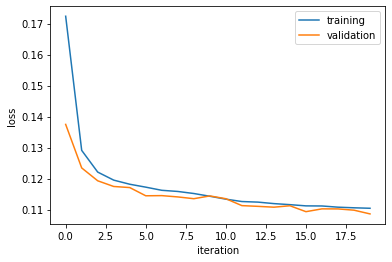

In [10]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()

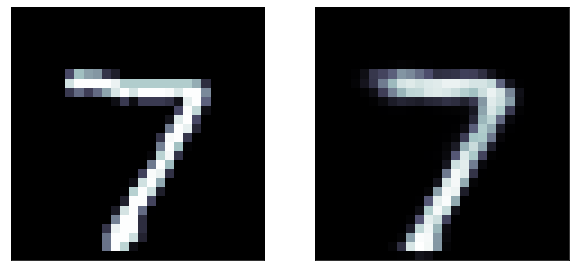

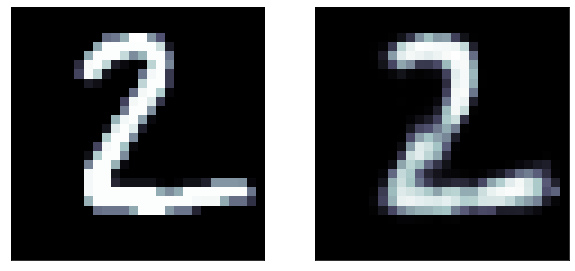

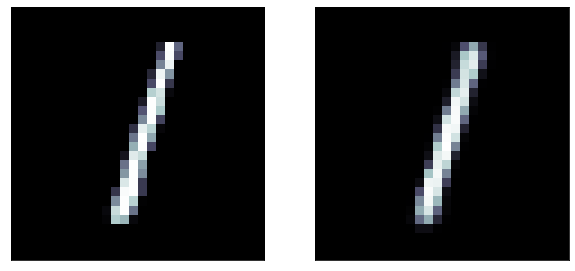

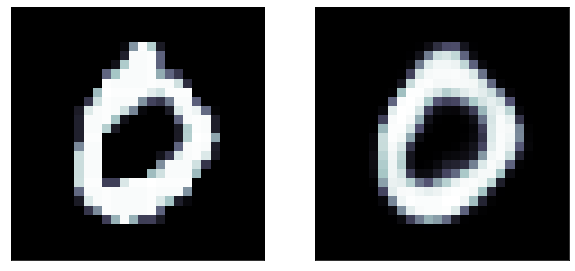

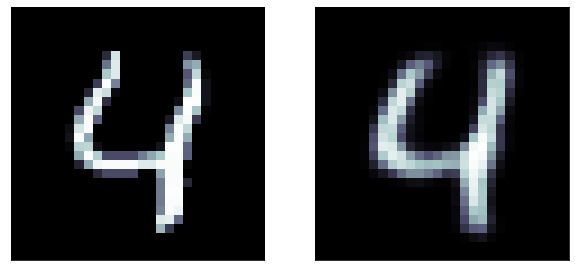

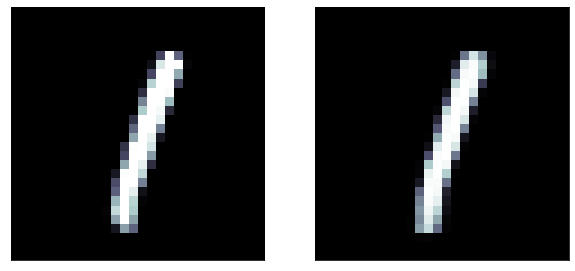

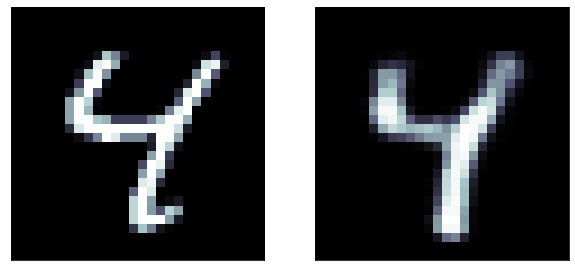

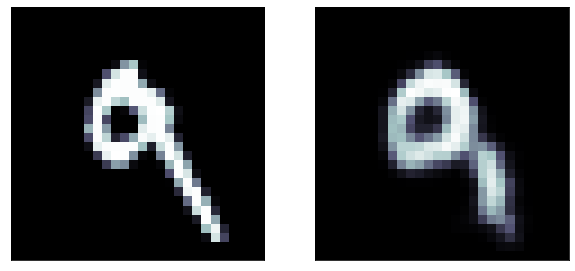

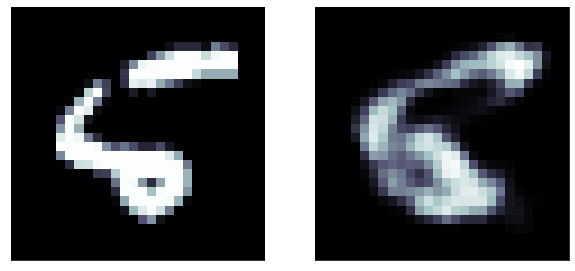

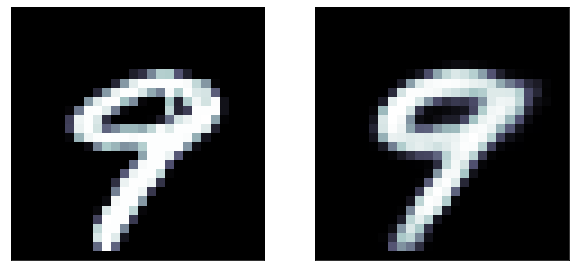

In [11]:
output = model.predict(x_test)
for i in range(10):
  compareinout(i, output, x_test)

In [21]:
output.shape

(10000, 784)

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (80, 784)                 615440    
                                                                 
 dense_22 (Dense)            (80, 256)                 200960    
                                                                 
 dense_23 (Dense)            (80, 128)                 32896     
                                                                 
 dense_24 (Dense)            (80, 64)                  8256      
                                                                 
 dense_25 (Dense)            (80, 32)                  2080      
                                                                 
 dense_26 (Dense)            (80, 64)                  2112      
                                                                 
 dense_27 (Dense)            (80, 128)                

In [27]:
output1=np.argmax(output,axis=1)

In [28]:
output1

array([739, 155, 434, ..., 573, 295, 572])

In [14]:
np.mean(output1[:])

425.9549

In [31]:
print(output.argmax())

4779478


In [53]:
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [58]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000, 10))

In [60]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
